<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-packages-and-data" data-toc-modified-id="Load-packages-and-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load packages and data</a></span></li><li><span><a href="#Demand-prediction" data-toc-modified-id="Demand-prediction-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Demand prediction</a></span></li></ul></div>

# Load packages and data

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
idx=pd.IndexSlice
from demand_tools import demand_prediction_mi
from alloy_binning import alloy_binning, shape_to_alloy

regions=['China', 'EU', 'Japan', 'NAM', 'ROW']
sectors=['Construction', 'Electrical', 'Industrial', 'Other', 'Transport']
shapes=['Copper', 'Tube', 'RBS', 'PSS', 'Wire', 'Cast']

In [2]:
# Intensity history
intensity_history=pd.read_excel('Data/Demand prediction data.xlsx', sheet_name='Intensity', index_col=0, header=[0,1])
intensity_2014=intensity_history.loc[2014, idx[:, :]]

# Volume prediction
volume=pd.read_excel('Data/Demand prediction data.xlsx', sheet_name='All sectors', index_col=0, header=[0,1])
volume_prediction=volume.loc[2015:, :]

# Price scenarios
price_scenarios=pd.read_excel('Data/Price scenarios.xlsx',sheet_name='Sheet1', index_col=0)
price_base=price_scenarios.loc[:, 'Scenario 1: constant']
price_high=price_scenarios.loc[:, 'Scenario 2: permanent high']
price_low=price_scenarios.loc[:, 'Scenario 3: permanent low']
price_up=price_scenarios.loc[:, 'Scenario 4: growing']
price_down=price_scenarios.loc[:, 'Scenario 5: shrinking']

# GDP growth
gdp_growth_prediction=pd.read_excel('Data/Demand prediction data.xlsx', sheet_name='GDP growth', index_col=0, usecols=np.arange(6))

# Elasticity
elas_sec_reg=pd.read_excel('Data/Copper_Elasticity_Estimates.xlsx', sheet_name='S+R S intercept only', index_col=0)

# Demand history
demand_history=pd.read_excel('Data/Demand prediction data.xlsx', sheet_name='Demand', index_col=0, header=[0,1])

# Sector to shape accounting matrix
sector_shape_matrix=pd.read_excel('Data/Sector to shape matrix.xlsx', sheet_name='Matrix', index_col=0)

# Demand prediction

Demand prediction based on intensity growth, volume growth and price elasticity

In [3]:
demand_prediction_base=demand_prediction_mi(price_series=price_base, gdp_growth_prediction=gdp_growth_prediction, 
                                            intensity_init=intensity_2014, volume_prediction=volume_prediction, 
                                            elas_mat=elas_sec_reg, method='sec and reg', verbose=1)

Calculating year:  2015
Calculating year:  2016
Calculating year:  2017
Calculating year:  2018
Calculating year:  2019
Calculating year:  2020
Calculating year:  2021
Calculating year:  2022
Calculating year:  2023
Calculating year:  2024
Calculating year:  2025
Calculating year:  2026
Calculating year:  2027
Calculating year:  2028
Calculating year:  2029
Calculating year:  2030
Calculating year:  2031
Calculating year:  2032
Calculating year:  2033
Calculating year:  2034
Calculating year:  2035
Calculating year:  2036
Calculating year:  2037
Calculating year:  2038
Calculating year:  2039
Calculating year:  2040


Demand by sector to demand by shape

In [4]:
demand_by_sector=demand_prediction_base.groupby(level=0, axis=1).sum()
demand_by_shape=pd.DataFrame(np.matmul(demand_by_sector, sector_shape_matrix.transpose()), 
                             index=demand_by_sector.index, columns=sector_shape_matrix.index)

Calculate alloy weights under each shape

In [5]:
alloy_weighting_cen, alloy_weighting_uns=alloy_binning()

In [6]:
shape_alloy_matrix=shape_to_alloy(alloy_weighting_cen)

Demand by shape to demand by alloy

In [9]:
demand_by_alloy=pd.DataFrame(np.matmul(demand_by_shape.iloc[:, 1:], shape_alloy_matrix.transpose()), 
                             index=demand_by_shape.index, columns=shape_alloy_matrix.index)

<IPython.core.display.Javascript object>


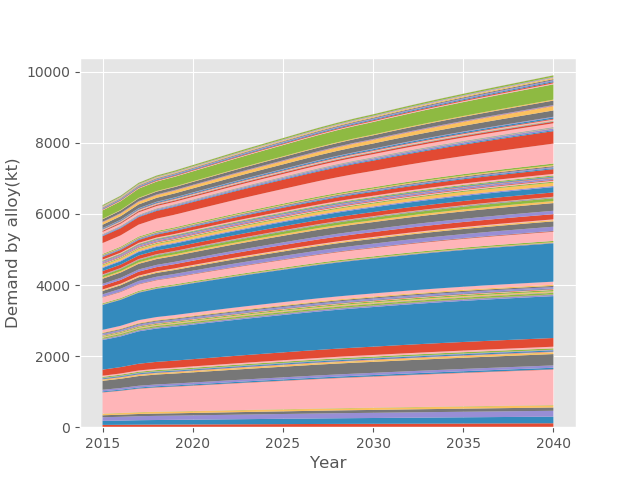

In [10]:
%matplotlib notebook
plt.style.use('ggplot')
plt.stackplot(demand_by_alloy.index, 
              demand_by_alloy.transpose(), labels=demand_by_alloy.columns)

plt.xlabel('Year')
plt.ylabel('Demand by alloy(kt)')
plt.show()